In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np

In [19]:
book1= pd.read_csv(r'C:\Users\ghoshs20\Desktop\My Projects\PG\logistic reg\Book1.csv')
book1.head()

,URL,Webserver,CMS,isscrappy
0,chillsoda.com,GWS,papaya CMS,Y
1,kick-ass-tube.com,nginx,Nucleus CMS,Y
2,minecraft-resourcepacks.com,IIS,Magento,N
3,westgate.com,IIS,Magento,N
4,storagetechguide.com,nginx,Contao,N


In [20]:
#Changing target variavle to binary
varlist =  ['isscrappy']
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

book1[varlist] = book1[varlist].apply(binary_map)

In [21]:
book1.head()

,URL,Webserver,CMS,isscrappy
0,chillsoda.com,GWS,papaya CMS,1
1,kick-ass-tube.com,nginx,Nucleus CMS,1
2,minecraft-resourcepacks.com,IIS,Magento,0
3,westgate.com,IIS,Magento,0
4,storagetechguide.com,nginx,Contao,0


In [22]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(book1[['Webserver', 'CMS']], drop_first=True)

# Adding the results to the master dataframe
book1 = pd.concat([book1, dummy1], axis=1)

book1.head()

,URL,Webserver,CMS,isscrappy,Webserver_GWS,Webserver_IIS,Webserver_LiteSpeed Web Server,Webserver_nginx,CMS_Contao,CMS_Dotclear,CMS_Fedora Commons,CMS_Jahia Community Distribution,CMS_Jamroom,CMS_Magento,CMS_Nucleus CMS,CMS_OctoberCMS,CMS_OpenWGA,CMS_papaya CMS
0,chillsoda.com,GWS,papaya CMS,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,kick-ass-tube.com,nginx,Nucleus CMS,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,minecraft-resourcepacks.com,IIS,Magento,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,westgate.com,IIS,Magento,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,storagetechguide.com,nginx,Contao,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [24]:
book1=book1.drop(['CMS','Webserver'],1)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Putting feature variable to X
X = book1.drop(['isscrappy','URL'], axis=1)

X.head()

,Webserver_GWS,Webserver_IIS,Webserver_LiteSpeed Web Server,Webserver_nginx,CMS_Contao,CMS_Dotclear,CMS_Fedora Commons,CMS_Jahia Community Distribution,CMS_Jamroom,CMS_Magento,CMS_Nucleus CMS,CMS_OctoberCMS,CMS_OpenWGA,CMS_papaya CMS
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [27]:
# Putting response variable to y
y = book1['isscrappy']

y.head()

0    1
1    1
2    0
3    0
4    0
Name: isscrappy, dtype: int64

In [28]:
#Test and Train data set 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [29]:
# Checking scrappy rate

sum(book1['isscrappy'])/len(book1['isscrappy'])*100

42.294229422942294

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

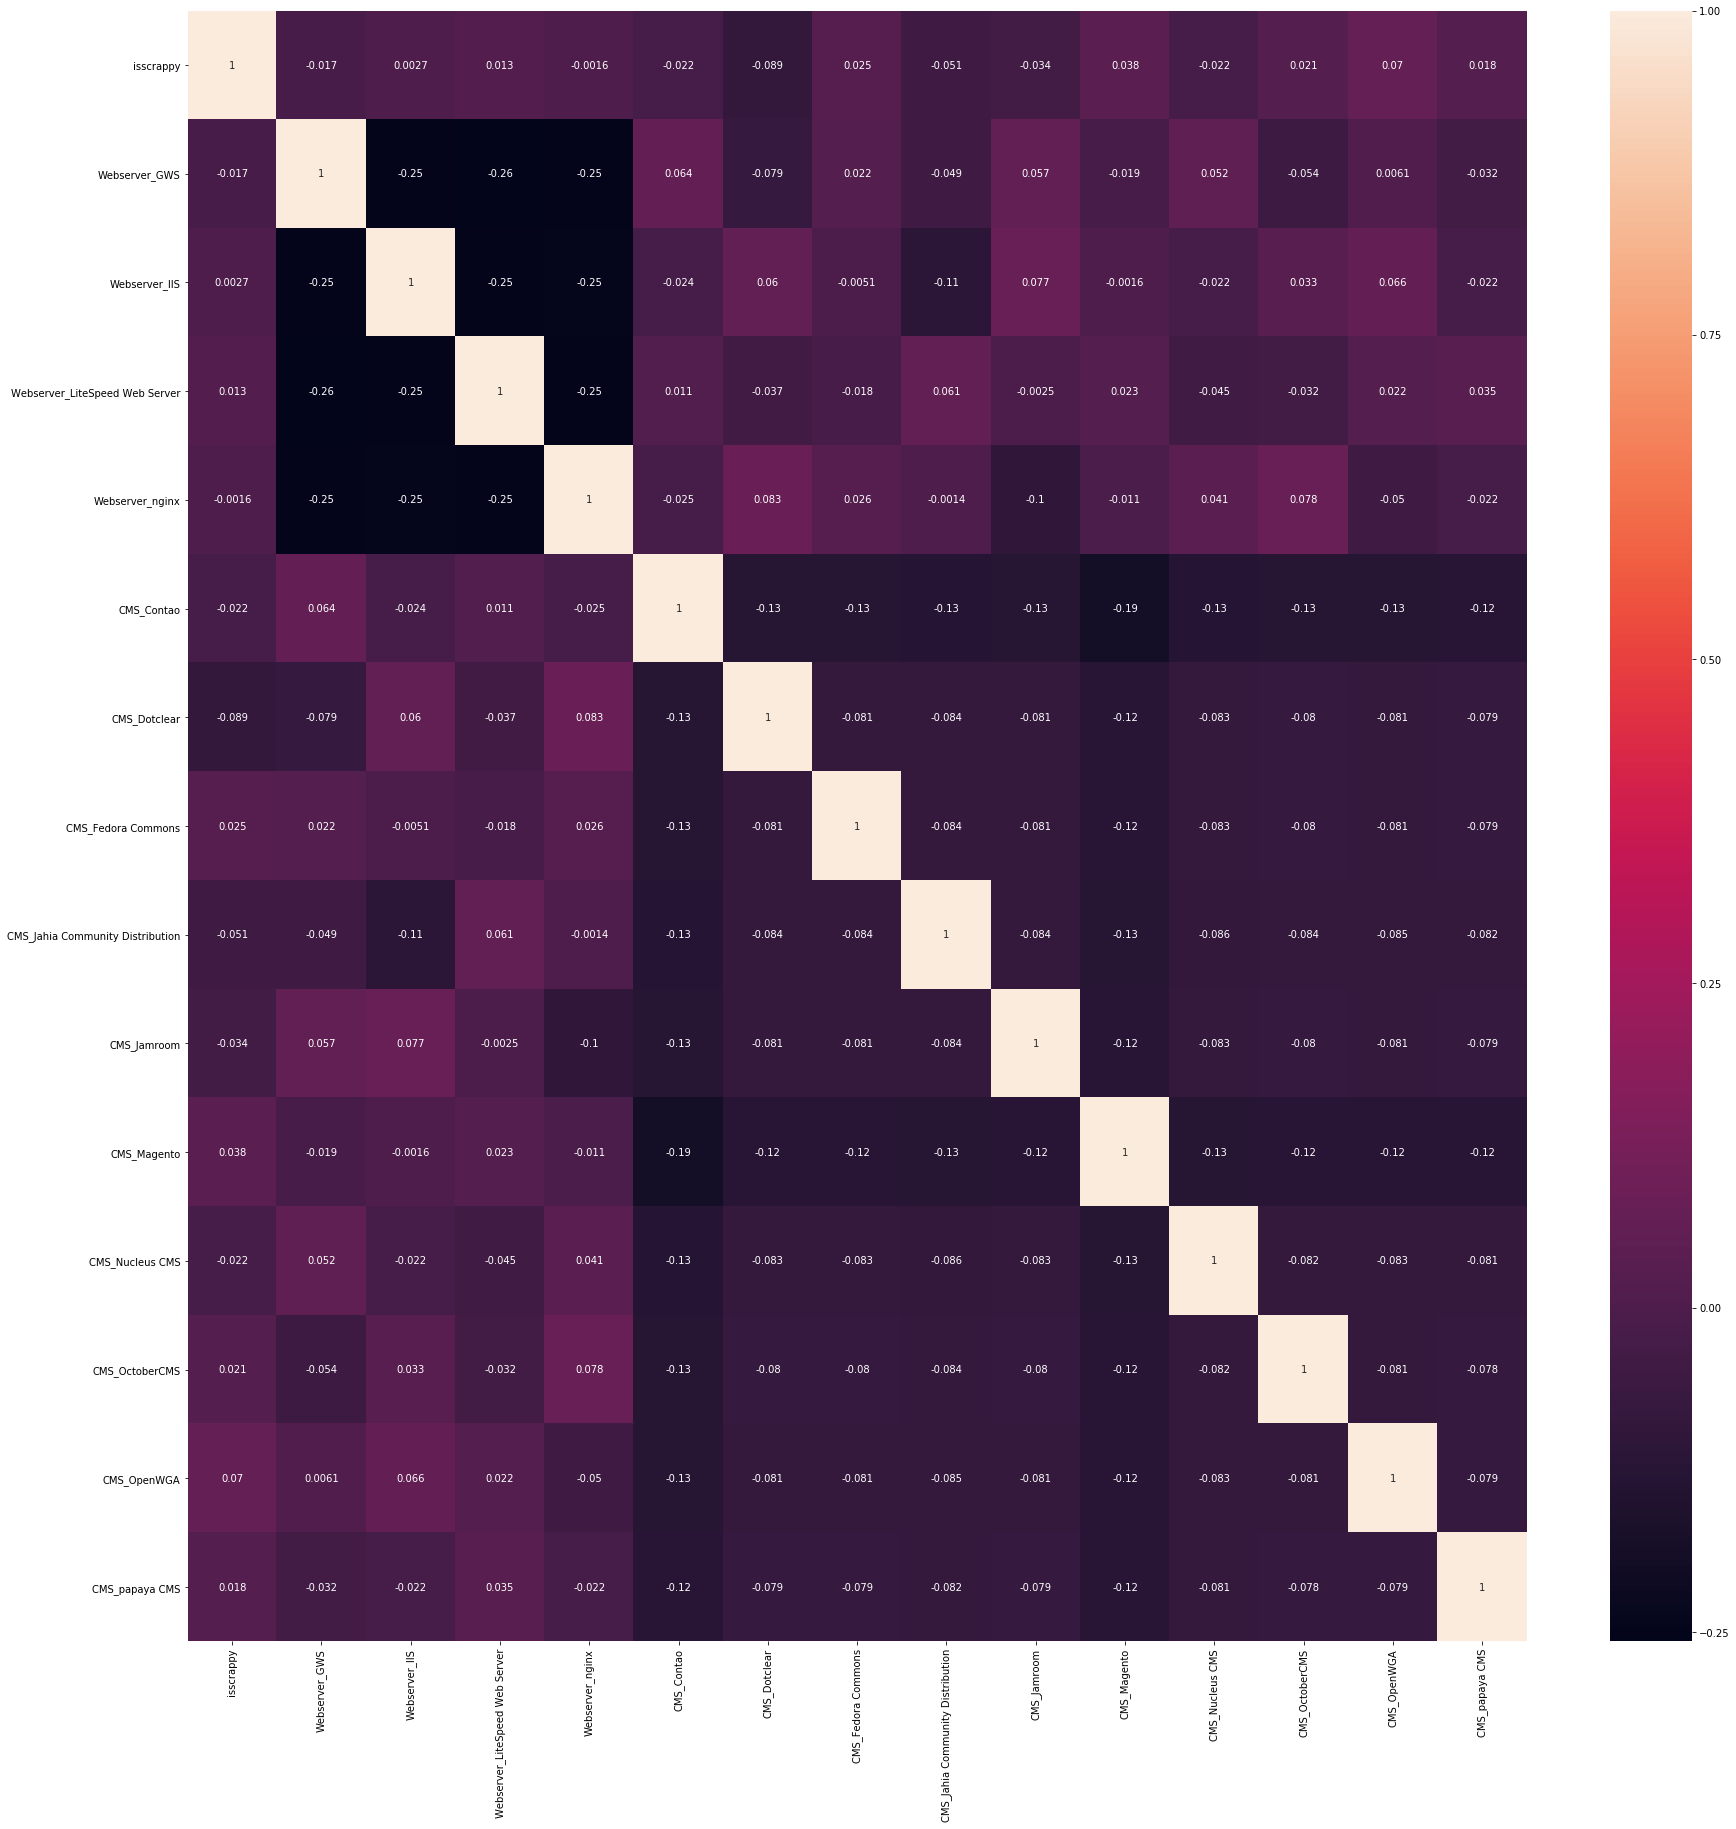

In [34]:
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(book1.corr(),annot = True)
plt.show()

In [36]:
import statsmodels.api as sm

In [37]:
# Creating First GLM model 
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              isscrappy   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6984
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4689.1
Date:                Wed, 20 Feb 2019   Deviance:                       9378.2
Time:                        07:25:55   Pearson chi2:                 7.00e+03
No. Iterations:                     4                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0584      0.098      0.597      0.550      -0.133       0.250
Webserver_GWS                       -0.1088      0.077     -1.406      0.160      -0.260       0.043
Webserver_IIS                        0.0177      0.080      0.223      0.824      -0.138       0.174
Webserver_LiteSpeed Web Server       0.0285      0.077      0.369      0.712      -0.123       0.180
Webserver_nginx                     -0.0129      0.079     -0.164      0.870      -0.168       0.142
CMS_Contao                          -0.4996      0.106     -4.713      0.000      -0.707      -0.292
CMS_Dotclear                        -1.0610      0.133     -7.952      0.000      -1.323      -0.800
CMS_Fedora Commons                  -0.1862      0.123     -1.511      0.131      -0.428       0.055
CMS_Jahia Community Distribution    -0.6884      0.124     -5.552      0.000      -0.931      -0.445
CMS_Jamroom                         -0.5844      0.126     -4.628      0.000      -0.832      -0.337
CMS_Magento                         -0.1804      0.106     -1.694      0.090      -0.389       0.028
CMS_Nucleus CMS                     -0.5328      0.125     -4.277      0.000      -0.777      -0.289
CMS_OctoberCMS                      -0.1747      0.125     -1.393      0.164      -0.420       0.071
CMS_OpenWGA                          0.0764      0.124      0.617      0.537      -0.166       0.319
CMS_papaya CMS                      -0.2420      0.128     -1.891      0.059      -0.493       0.009
====================================================================================================
"""

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [39]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 7)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)

In [40]:
rfe.support_

array([False, False, False, False,  True,  True,  True,  True,  True,
       False,  True, False, False,  True])

In [42]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Webserver_GWS', 'Webserver_IIS', 'Webserver_LiteSpeed Web Server',
       'Webserver_nginx', 'CMS_Magento', 'CMS_OctoberCMS', 'CMS_OpenWGA'],
      dtype='object')

In [43]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              isscrappy   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6991
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4695.0
Date:                Wed, 20 Feb 2019   Deviance:                       9390.0
Time:                        07:37:15   Pearson chi2:                 7.00e+03
No. Iterations:                     4                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0490      0.039     -1.262      0.207      -0.125       0.027
CMS_Contao                          -0.4139      0.071     -5.810      0.000      -0.553      -0.274
CMS_Dotclear                        -0.9579      0.107     -8.943      0.000      -1.168      -0.748
CMS_Fedora Commons                  -0.1005      0.095     -1.059      0.290      -0.287       0.086
CMS_Jahia Community Distribution    -0.5902      0.096     -6.171      0.000      -0.778      -0.403
CMS_Jamroom                         -0.4973      0.098     -5.062      0.000      -0.690      -0.305
CMS_Nucleus CMS                     -0.4510      0.097     -4.666      0.000      -0.640      -0.262
CMS_papaya CMS                      -0.1412      0.101     -1.398      0.162      -0.339       0.057
====================================================================================================
"""

In [44]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1191    0.487750
6330    0.267578
1131    0.487750
6293    0.487750
6578    0.487750
4201    0.462687
138     0.366730
9406    0.267578
5326    0.345423
7443    0.386306
dtype: float64

In [45]:
y_train_pred_final = pd.DataFrame({'isscrappy':y_train.values, 'scrappy_Prob':y_train_pred})
y_train_pred_final['URL'] = y_train.index
y_train_pred_final.head()

,isscrappy,scrappy_Prob,URL
1191,0,0.487750,1191
6330,0,0.267578,6330
1131,1,0.487750,1131
6293,1,0.487750,6293
6578,1,0.487750,6578


In [50]:
y_train_pred_final['predicted'] = y_train_pred_final.scrappy_Prob.map(lambda x: 1 if x > 0.45 else 0)

# Let's see the head
y_train_pred_final.head()

,isscrappy,scrappy_Prob,URL,predicted
1191,0,0.487750,1191,1
6330,0,0.267578,6330,0
1131,1,0.487750,1131,1
6293,1,0.487750,6293,1
6578,1,0.487750,6578,1


In [47]:
from sklearn import metrics

In [51]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.isscrappy, y_train_pred_final.predicted )
print(confusion)

[[2153 1901]
 [1193 1752]]


In [ ]:
# Predicted     not_scrappy    scrappy
# Actual
# not_scrappy        2153      1901
# scrappy            1193       1752  

In [52]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.isscrappy, y_train_pred_final.predicted))

0.5579368481211602


In [53]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,CMS_papaya CMS,0.45
0,CMS_Contao,0.13
3,CMS_Jahia Community Distribution,0.12
5,CMS_Nucleus CMS,0.06
2,CMS_Fedora Commons,0.04
4,CMS_Jamroom,0.03
1,CMS_Dotclear,0.00


In [ ]:
col = col.drop('CMS_papaya CMS', 1)
col
col = col.drop('CMS_Fedora Commons', 1)
col

In [63]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              isscrappy   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6993
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4696.3
Date:                Wed, 20 Feb 2019   Deviance:                       9392.7
Time:                        16:53:17   Pearson chi2:                 7.00e+03
No. Iterations:                     4                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0816      0.033     -2.465      0.014      -0.147      -0.017
CMS_Contao                          -0.3812      0.068     -5.583      0.000      -0.515      -0.247
CMS_Dotclear                        -0.9253      0.105     -8.798      0.000      -1.131      -0.719
CMS_Jahia Community Distribution    -0.5576      0.093     -5.966      0.000      -0.741      -0.374
CMS_Jamroom                         -0.4647      0.096     -4.835      0.000      -0.653      -0.276
CMS_Nucleus CMS                     -0.4184      0.095     -4.427      0.000      -0.604      -0.233
====================================================================================================
"""

In [64]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)


In [65]:
y_train_pred_final['scrappy_Prob'] = y_train_pred

In [108]:
# Creating new column 'predicted' with 1 if scrappy_Prob > 0.45 else 0
y_train_pred_final['predicted'] = y_train_pred_final.scrappy_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,isscrappy,scrappy_Prob,URL,predicted
1191,0,0.479606,1191,1
6330,0,0.267578,6330,0
1131,1,0.479606,1131,1
6293,1,0.479606,6293,1
6578,1,0.479606,6578,1


In [109]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.isscrappy, y_train_pred_final.predicted))

0.5579368481211602


In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,CMS_Contao,0.13
2,CMS_Jahia Community Distribution,0.12
4,CMS_Nucleus CMS,0.06
3,CMS_Jamroom,0.03
1,CMS_Dotclear,0.00


In [111]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.isscrappy, y_train_pred_final.predicted )
confusion

array([[2153, 1901],
       [1193, 1752]], dtype=int64)

In [ ]:
# Actual/Predicted     not_scrappy    scrappy
        # not_scrappy        2153      1901
        # scrappy            1193       1752 

In [112]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.isscrappy, y_train_pred_final.predicted)

0.5579368481211602

In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5949066213921902

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.5310804144055254

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.isscrappy, y_train_pred_final.scrappy_Prob, drop_intermediate = False )

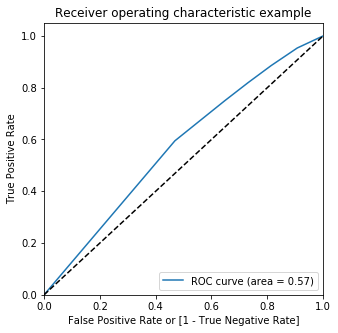

In [118]:
draw_roc(y_train_pred_final.isscrappy, y_train_pred_final.scrappy_Prob)

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.scrappy_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,isscrappy,scrappy_Prob,URL,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1191,0,0.479606,1191,1,1,1,1,1,1,0,0,0,0,0
6330,0,0.267578,6330,0,1,1,1,0,0,0,0,0,0,0
1131,1,0.479606,1131,1,1,1,1,1,1,0,0,0,0,0
6293,1,0.479606,6293,1,1,1,1,1,1,0,0,0,0,0
6578,1,0.479606,6578,1,1,1,1,1,1,0,0,0,0,0


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.isscrappy, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.420774  1.000000  0.000000
0.1   0.1  0.420774  1.000000  0.000000
0.2   0.2  0.420774  1.000000  0.000000
0.3   0.3  0.454779  0.953480  0.092501
0.4   0.4  0.557937  0.594907  0.531080
0.5   0.5  0.579226  0.000000  1.000000
0.6   0.6  0.579226  0.000000  1.000000
0.7   0.7  0.579226  0.000000  1.000000
0.8   0.8  0.579226  0.000000  1.000000
0.9   0.9  0.579226  0.000000  1.000000


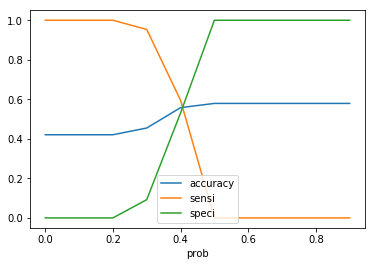

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.scrappy_Prob.map( lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

,isscrappy,scrappy_Prob,URL,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1191,0,0.479606,1191,1,1,1,1,1,1,0,0,0,0,0,1
6330,0,0.267578,6330,0,1,1,1,0,0,0,0,0,0,0,0
1131,1,0.479606,1131,1,1,1,1,1,1,0,0,0,0,0,1
6293,1,0.479606,6293,1,1,1,1,1,1,0,0,0,0,0,1
6578,1,0.479606,6578,1,1,1,1,1,1,0,0,0,0,0,1


In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.isscrappy, y_train_pred_final.final_predicted)

0.5579368481211602

In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.isscrappy, y_train_pred_final.final_predicted )
confusion2

array([[2153, 1901],
       [1193, 1752]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5949066213921902

In [127]:
# Let us calculate specificity
TN / float(TN+FP)

0.5310804144055254

In [128]:
#Make predictions on test data

X_test = X_test[col]
X_test.head()

,CMS_Contao,CMS_Dotclear,CMS_Jahia Community Distribution,CMS_Jamroom,CMS_Nucleus CMS
9706,0,0,0,0,0
9334,0,0,0,0,1
3854,0,0,0,0,1
2029,1,0,0,0,0
3539,0,0,0,0,0


In [130]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [131]:
y_test_pred[:10]

9706    0.479606
9334    0.377532
3854    0.377532
2029    0.386306
3539    0.479606
1942    0.479606
1250    0.366730
2817    0.479606
4211    0.267578
477     0.479606
dtype: float64

In [132]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [133]:
# Let's see the head
y_pred_1.head()

,0
9706,0.479606
9334,0.377532
3854,0.377532
2029,0.386306
3539,0.479606


In [134]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [135]:
# Putting CustID to index
y_test_df['Url'] = y_test_df.index

In [136]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [137]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [138]:
y_pred_final.head()

,isscrappy,Url,0
0,0,9706,0.479606
1,0,9334,0.377532
2,0,3854,0.377532
3,0,2029,0.386306
4,1,3539,0.479606


In [139]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'scrappy_Prob'})

In [140]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Url','isscrappy','scrappy_Prob'], axis=1)

In [141]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Url,isscrappy,scrappy_Prob
0,9706,0,0.479606
1,9334,0,0.377532
2,3854,0,0.377532
3,2029,0,0.386306
4,3539,1,0.479606


In [142]:
y_pred_final['final_predicted'] = y_pred_final.scrappy_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [143]:
y_pred_final.head()

,Url,isscrappy,scrappy_Prob,final_predicted
0,9706,0,0.479606,1
1,9334,0,0.377532,0
2,3854,0,0.377532,0
3,2029,0,0.386306,0
4,3539,1,0.479606,1


In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.isscrappy, y_pred_final.final_predicted)

0.5503333333333333

In [145]:
confusion2 = metrics.confusion_matrix(y_pred_final.isscrappy, y_pred_final.final_predicted )
confusion2

array([[881, 835],
       [514, 770]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5996884735202492

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.5134032634032634